# Unsupervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

#### Imports

##### Colab

In [ ]:
# Colab, mount drive
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# %cd drive/MyDrive/Colab\ Notebooks/ang-lhl-ml-project-unsupervised-learning
# !ls

[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks/ang-lhl-ml-project-unsupervised-learning'
/content/drive/MyDrive/Colab Notebooks/ang-lhl-ml-project-unsupervised-learning
 data   functions.py   pretty_fancy.ipynb   README.md
 etc    images	       __pycache__	   'Unsupervised Learning - Project.ipynb'


##### VSCode

In [ ]:
# Usuals
import os
import pandas as pd
import numpy as np
import math
from scipy import stats

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Functions
from functions import *

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- **Data Import:** Import the dataset into a statistical software tool such as Python or R.
- **Data Description:** Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- **Data Cleaning:** Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
- **Data Visualization:** Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- **Outlier Detection:** Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- **Correlation Analysis:** Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- **Data Transformation:** If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- **Feature Selection:** Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

### Data Import, Description, Cleaning

#### Data Import

In [106]:
data = pd.read_csv('data/Wholesale_Data.csv')

data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# Output paths for later...
data_path = 'data/'
outputs_path = 'data/processed/'

In [118]:
# os.path.exists(data_path)
# os.path.exists(outputs_path)

#### Data Description

In [119]:
data.info() # No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [120]:
data.columns

# ['Channel', 'Region'] -- Nominal
# ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'] -- Continuous

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [121]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


> - There are no null values.
> - The **min** values of the numerical columns seems extremely low compared to its **max**.
    - There may be outliers...
    - The data is definitely skewed... (log scaling...)
    - The columns have different scales... (standardize/normalize...)

In [122]:
# Using a custom function to get a quick overview of the data, the values in its columns and what they look like.
overview = cols_overview(data)

overview.head()

,nulls_count,col_name,col_dtype,nunique,unique,col_data_1,col_data_2
0,0,Channel,"Channel <class 'int'> 440 Name: count, dtyp...",2,"[2, 1]","[2, 2, 2, 1, 2]","[1, 1, 2, 1, 1]"
1,0,Region,"Region <class 'int'> 440 Name: count, dtype...",3,"[3, 1, 2]","[3, 3, 3, 3, 3]","[3, 3, 3, 3, 3]"
2,0,Fresh,"Fresh <class 'int'> 440 Name: count, dtype:...",433,"[12669, 7057, 6353, 13265, 22615, 9413, 12126,...","[12669, 7057, 6353, 13265, 22615]","[29703, 39228, 14531, 10290, 2787]"
3,0,Milk,"Milk <class 'int'> 440 Name: count, dtype: ...",421,"[9656, 9810, 8808, 1196, 5410, 8259, 3199, 495...","[9656, 9810, 8808, 1196, 5410]","[12051, 1431, 15488, 1981, 1698]"
4,0,Grocery,"Grocery <class 'int'> 440 Name: count, dtyp...",430,"[7561, 9568, 7684, 4221, 7198, 5126, 6975, 942...","[7561, 9568, 7684, 4221, 7198]","[16027, 764, 30243, 2232, 2510]"


In [123]:
# No real need to change the data types of the columns... but to save memory, we can change the categorical columns to int8.
data['Channel'] = data['Channel'].astype('int8') # The values are 1 and 2.
data['Region'] = data['Region'].astype('int8') # The values are 1, 2, and 3.

# The rest of the columns could be changed to int16, but it's not necessary.

##### Data Cleaning

In [124]:
data.duplicated().sum() # No duplicates

0

In [125]:
# None of the columns have missing values
# No duplicates
# Not a lot of cleaning to do.

### Data Visualization

In [75]:
img_path = 'images/' # Path to save the images for later...
os.path.exists(img_path)

True

In [107]:
# Colors
palette_a = sns.color_palette("viridis", len(data.columns[2:]))
palette_b = palette_a[::-1]

##### Part 1 -- Histogram

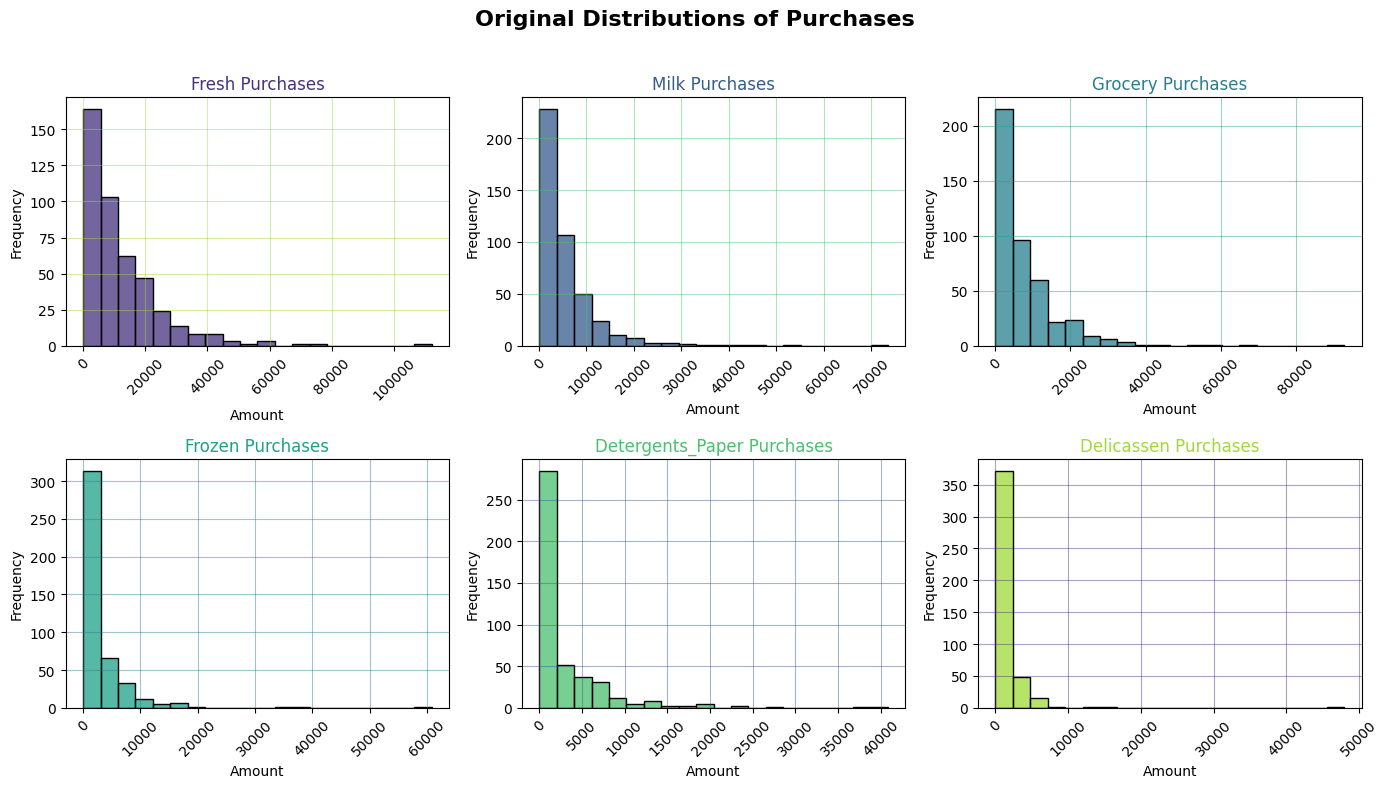

In [128]:
# Histogram for the continuous columns
columns = data.columns[2:]

num_cols = len(columns)
num_rows = (num_cols + 2) // 3
num_cols_per_row = min(num_cols, 3)

fig, axes = plt.subplots(num_rows, 3, figsize=(14, 8))
axes = axes.flatten()

# Subplots
for i, col in enumerate(columns):
    ax = axes[i]
    sns.histplot(data=data,
                 x=col,
                 ax=ax,
                 bins=20,
                 fill=True,
                 color=palette_a[i],
                 edgecolor='black')
    ax.set_title(f'{col} Purchases',
                 fontsize=12,
                 fontweight='medium',
                 color=palette_a[i])
    ax.set_xlabel('Amount',
                  fontsize=10)
    ax.set_ylabel('Frequency',
                  fontsize=10)
    ax.grid(True,
            alpha=.45,
            color=palette_b[i])
    ax.tick_params(axis='x',
                   rotation=45)

# The rest...
fig.suptitle("Original Distributions of Purchases",
             fontsize=16,
             fontweight='bold')
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(f'{img_path}Orig_Distributions.png',
            dpi=300,
            bbox_inches='tight')
plt.show()

  > The columns appear to be right-skewed.

##### Part 2 -- Scatter Plot

In [129]:
# Numericals
nums = data.select_dtypes(include='int64') # Should exclude the categorical columns (Channel, Region), since I converted those to int8

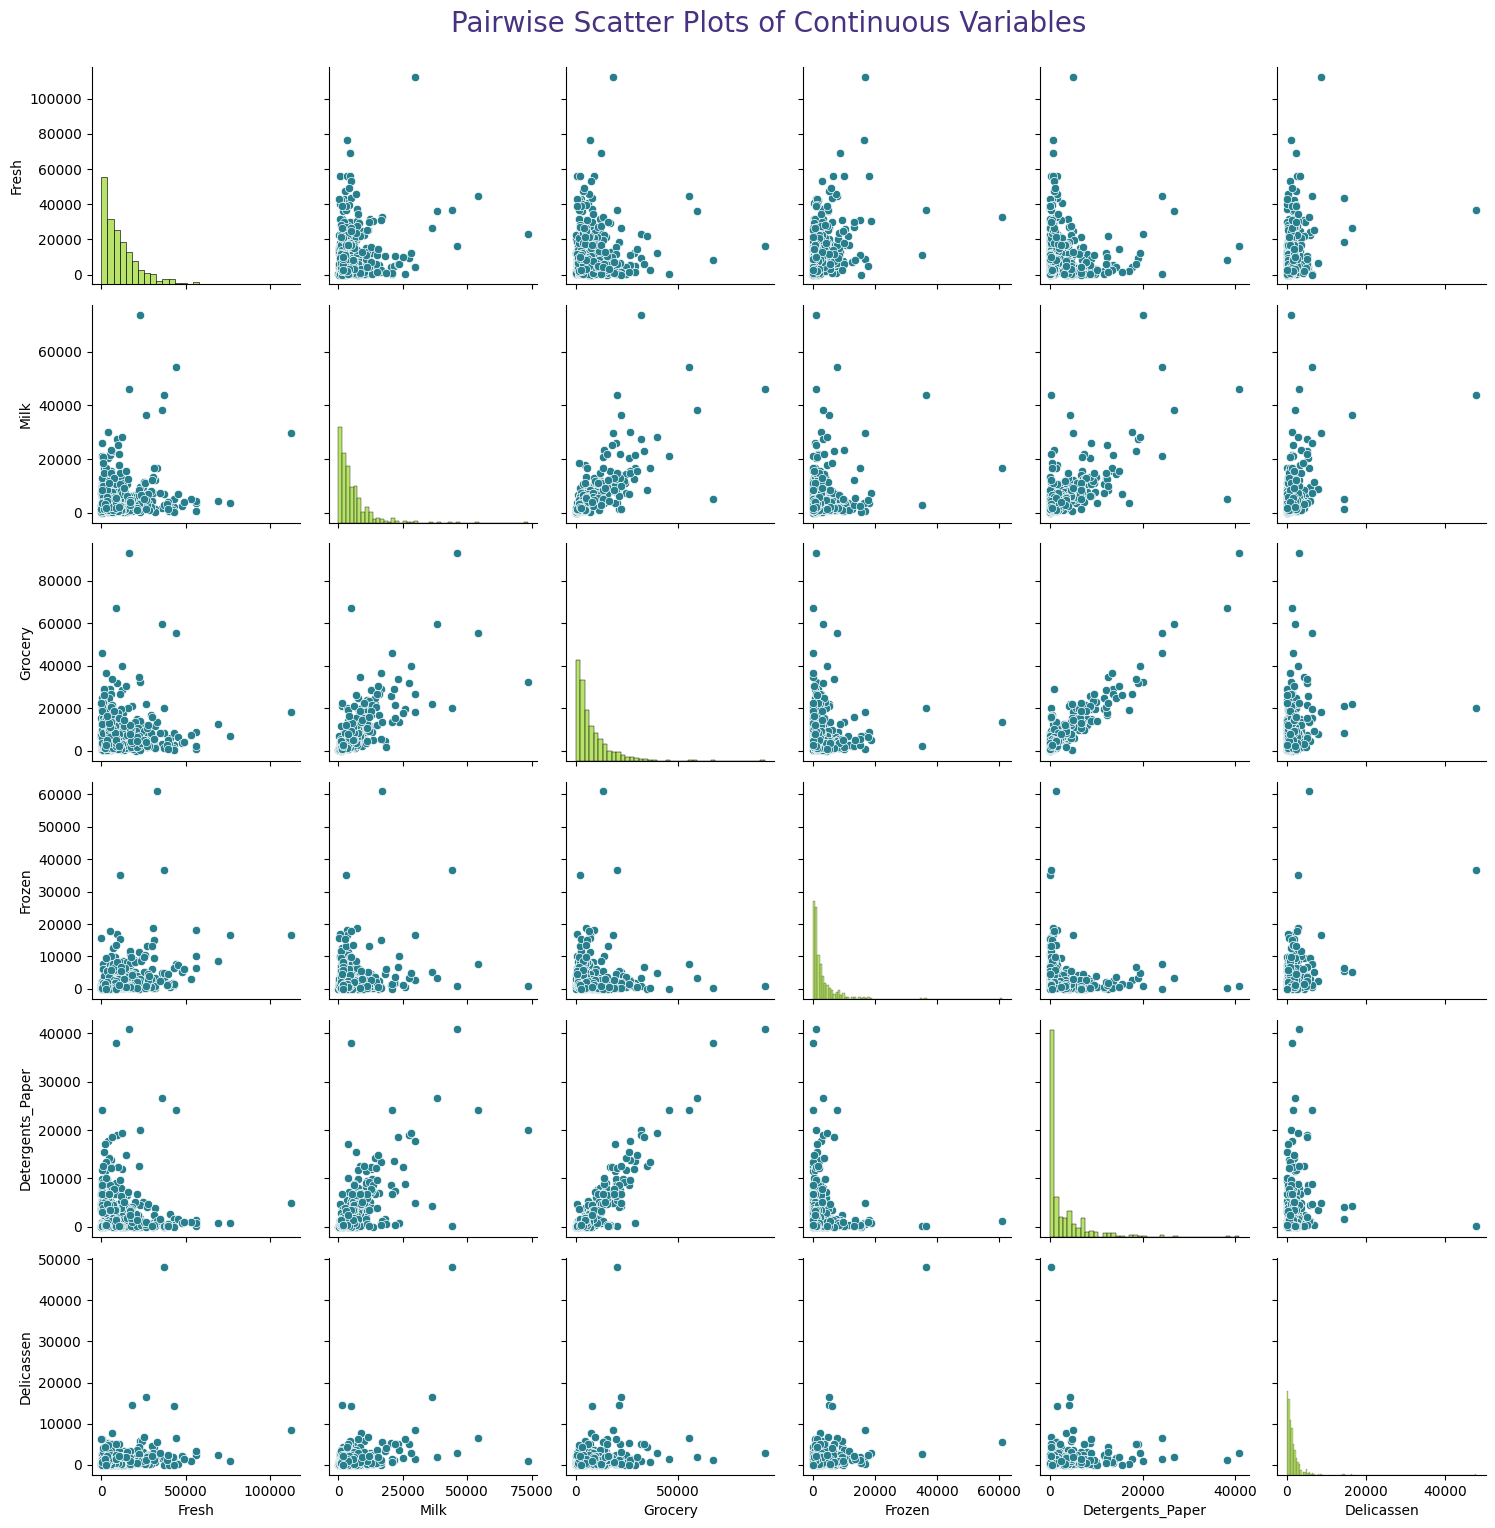

In [130]:
# Plotting
pair_plot = sns.PairGrid(nums)
pair_plot = pair_plot.map_diag(sns.histplot,
                               color=palette_a[5])
pair_plot = pair_plot.map_offdiag(sns.scatterplot,
                                  color=palette_a[2])

plt.suptitle("Pairwise Scatter Plots of Continuous Variables",
             fontsize=20,
             fontweight='medium',
             color=palette_a[0],
             y=1.02)

#plt.tight_layout()
plt.savefig(f'{img_path}Pairwise_Scatter_Plots.png',
            dpi=300,
            bbox_inches='tight')
plt.show()

- **Grocery** purchasing appear to be positively correlated to **Detergents_Paper** and  **Milk** purchases.

  > We can check.

##### Part 3 -- Correlation Heatmap

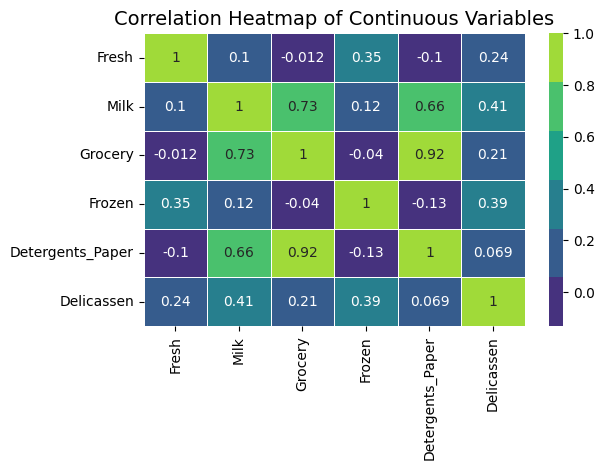

In [131]:
# Calculate the correlation heatmap
correlation_matrix = nums.corr()

sns.heatmap(correlation_matrix,
            annot=True,
            cmap=palette_a,
            linewidths=.5)

plt.title("Correlation Heatmap of Continuous Variables",
          fontsize=14,
          fontweight='medium')
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig(f'{img_path}Correlation_Heatmap.png',
            dpi=300,
            bbox_inches='tight')
plt.show()

Positive Correlations:
- **Milk** is positively correlated to both Grocery and Detergents_Paper
- **Grocery** is positively correlated to both Milk and Detergents_Paper
- **Detergents_Paper** is positively correlated to both Milk and Grocery.

### Outlier Detection

##### Z-Score method...

In [132]:
# Checking Outliers
z_scores = np.abs(stats.zscore(nums))
threshold = 3 # Rule of thumb
outliers_z = np.where(z_scores > threshold)

print("Z-Score - Outliers:")
print('Row Nums: \n', outliers_z[0])
print('Columns: \n', outliers_z[1])

Z-Score - Outliers:
Row Nums: 
 [ 23  23  39  47  47  47  56  56  61  61  61  65  65  71  85  85  85  86
  86  87  92  93 103 103 125 181 181 183 183 183 196 211 211 211 216 251
 258 259 284 325 333 333 413]
Columns: 
 [1 5 0 1 2 4 1 4 1 2 4 2 4 5 1 2 4 1 4 5 4 3 0 3 0 0 1 1 3 5 3 1 2 4 2 4 0
 0 0 3 2 4 3]


In [133]:
dictionary = {
  'Row_Nums': outliers_z[0],
  'Columns': outliers_z[1],
  'Column_Name': [columns[i] for i in outliers_z[1]],
}

# Creating a DataFrame
outliers_df = pd.DataFrame(dictionary)
outliers_df.head()

,Row_Nums,Columns,Column_Name
0,23,1,Milk
1,23,5,Delicassen
2,39,0,Fresh
3,47,1,Milk
4,47,2,Grocery


In [134]:
# display outlier rows for each column from nums
for col in columns:
    print(f'Outliers for {col}: {len(outliers_df[outliers_df["Column_Name"] == col])}')
    display(nums.iloc[outliers_df[outliers_df['Column_Name'] == col]['Row_Nums']])
    print('===========================================')

Outliers for Fresh: 7


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
39,56159,555,902,10002,212,2916
103,56082,3504,8906,18028,1480,2498
125,76237,3473,7102,16538,778,918
181,112151,29627,18148,16745,4948,8550
258,56083,4563,2124,6422,730,3321
259,53205,4959,7336,3012,967,818
284,68951,4411,12609,8692,751,2406


Outliers for Milk: 9


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
23,26373,36423,22019,5154,4337,16523
47,44466,54259,55571,7782,24171,6465
56,4098,29892,26866,2616,17740,1340
61,35942,38369,59598,3254,26701,2017
85,16117,46197,92780,1026,40827,2944
86,22925,73498,32114,987,20070,903
181,112151,29627,18148,16745,4948,8550
183,36847,43950,20170,36534,239,47943
211,12119,28326,39694,4736,19410,2870


Outliers for Grocery: 7


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
47,44466,54259,55571,7782,24171,6465
61,35942,38369,59598,3254,26701,2017
65,85,20959,45828,36,24231,1423
85,16117,46197,92780,1026,40827,2944
211,12119,28326,39694,4736,19410,2870
216,2532,16599,36486,179,13308,674
333,8565,4980,67298,131,38102,1215


Outliers for Frozen: 6


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
93,11314,3090,2062,35009,71,2698
103,56082,3504,8906,18028,1480,2498
183,36847,43950,20170,36534,239,47943
196,30624,7209,4897,18711,763,2876
325,32717,16784,13626,60869,1272,5609
413,4983,4859,6633,17866,912,2435


Outliers for Detergents_Paper: 10


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
47,44466,54259,55571,7782,24171,6465
56,4098,29892,26866,2616,17740,1340
61,35942,38369,59598,3254,26701,2017
65,85,20959,45828,36,24231,1423
85,16117,46197,92780,1026,40827,2944
86,22925,73498,32114,987,20070,903
92,9198,27472,32034,3232,18906,5130
211,12119,28326,39694,4736,19410,2870
251,6134,23133,33586,6746,18594,5121
333,8565,4980,67298,131,38102,1215


Outliers for Delicassen: 4


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
23,26373,36423,22019,5154,4337,16523
71,18291,1266,21042,5373,4173,14472
87,43265,5025,8117,6312,1579,14351
183,36847,43950,20170,36534,239,47943


In [ ]:
# Sort by rows that are outliers in multiple columns:
multiples = outliers_df['Row_Nums'].value_counts()

multiples.head()

,count
Row_Nums,
211,3
47,3
183,3
61,3
85,3


In [136]:
# Drop the rows that are outliers in multiple columns 1+
outliers = multiples[multiples > 1].index
data = data.drop(outliers)
nums = nums.drop(outliers)

In [137]:
data.shape, nums.shape

((428, 8), (428, 6))

In [138]:
# For the rest of the outliers, I'm going to implement a min-max value...
for col in nums.columns:
    max_val = nums[col].quantile(.95)
    min_val = nums[col].quantile(.05)
    nums[col] = np.clip(nums[col], min_val, max_val)

##### Visually checking the outliers with boxplots...

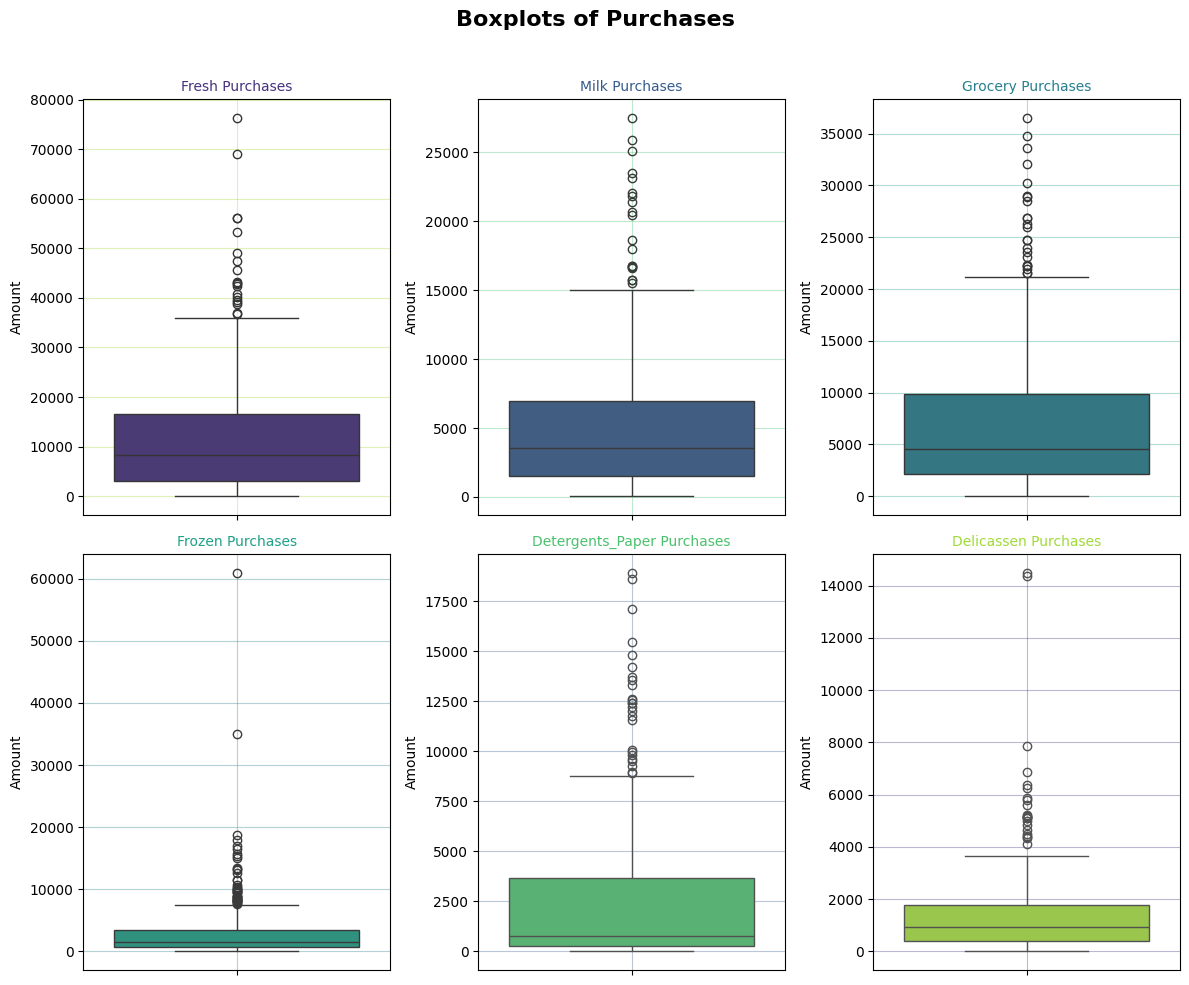

In [139]:
# Grid of subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(12,10))
axes = axes.flatten()

# Boxplot's subplots...
for i, col in enumerate(columns):
    ax = axes[i]
    sns.boxplot(data=data,
                y=col,
                ax=ax,
                color=palette_a[i])
    ax.set_title(f'{col} Purchases',
                 fontsize=10,
                 color=palette_a[i])
    ax.set_ylabel('Amount')
    ax.grid(True,
            alpha=.35,
            color=palette_b[i])

# The rest...
fig.suptitle("Boxplots of Purchases",
             fontsize=16,
             fontweight='bold')
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(f'{img_path}Boxplots.png',
            dpi=300,
            bbox_inches='tight')
plt.show()

##### Correlation Analysis

Re-checking the correlations after the outliers have been dealt with.

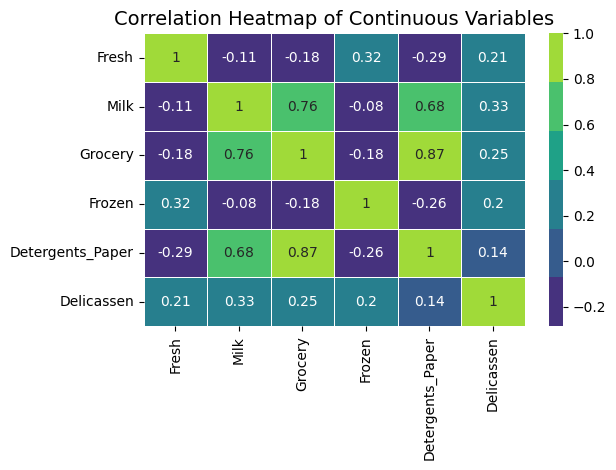

In [140]:
# Calculate the correlation matrix
correlation_matrix = nums.corr()

sns.heatmap(correlation_matrix,
            annot=True,
            cmap=palette_a,
            linewidths=.5)

plt.title("Correlation Heatmap of Continuous Variables",
          fontsize=14,
          fontweight='medium')
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig(f'{img_path}Correlation_Heatmap_2.png',
            dpi=300,
            bbox_inches='tight')
plt.show()

> The positive correlations initially observed are still present.

### Data Transformation

In [141]:
# Skew Check...
skew = nums.skew().sort_values(ascending=False)

print(f'Original Skewness: \n{skew}') # I'm transforming values greater than .7 or less than -.7, so all...

Original Skewness: 
Frozen              1.432486
Detergents_Paper    1.340104
Delicassen          1.252126
Grocery             1.166998
Milk                1.053473
Fresh               0.932070
dtype: float64


Log Transform...

In [142]:
# Log transformation
nums = np.log1p(nums)

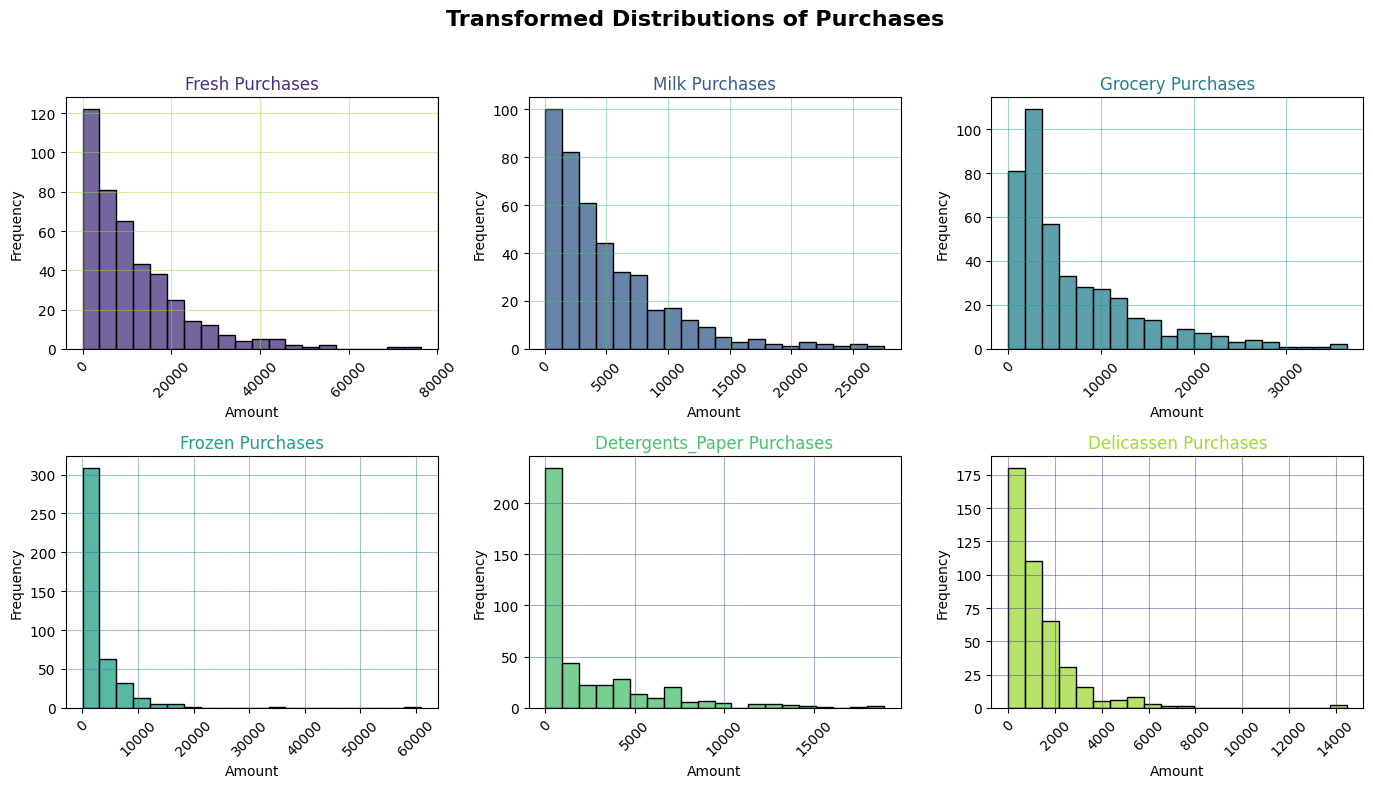

In [143]:
# Histogram for the continuous columns
fig, axes = plt.subplots(num_rows, 3, figsize=(14, 8))
axes = axes.flatten()

# Visualize again...
for i, col in enumerate(columns):
    ax = axes[i]
    sns.histplot(data=data,
                 x=col,
                 ax=ax,
                 bins=20,
                 fill=True,
                 color=palette_a[i],
                 edgecolor='black')
    ax.set_title(f'{col} Purchases',
                 fontsize=12,
                 fontweight='medium',
                 color=palette_a[i])
    ax.set_xlabel('Amount',
                  fontsize=10)
    ax.set_ylabel('Frequency',
                  fontsize=10)
    ax.grid(True,
            alpha=.45,
            color=palette_b[i])
    ax.tick_params(axis='x',
                   rotation=45)

# The rest...
fig.suptitle("Transformed Distributions of Purchases",
             fontsize=16,
             fontweight='bold')
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(f'{img_path}Log_Distributions.png',
            dpi=300,
            bbox_inches='tight')
plt.show()

In [144]:
# Skew Check...
skew = nums.skew().sort_values(ascending=False)

print(f'Transformed Skewness: \n{skew}') # The skewness are now within acceptable ranges

Transformed Skewness: 
Detergents_Paper   -0.020348
Grocery            -0.025571
Milk               -0.165590
Frozen             -0.234063
Delicassen         -0.608970
Fresh              -0.764459
dtype: float64


### Feature Selection

In [145]:
print('Data --- >', data.shape)
print('Numericals --- >', nums.shape) # No categorical columns

Data --- > (428, 8)
Numericals --- > (428, 6)


In [146]:
columns = data.columns[2:]

In [147]:
# Compute variance of each feature
variance = nums.var()

variance.sort_values(ascending=False)

,0
Detergents_Paper,2.345600
Fresh,1.442578
Frozen,1.312023
Delicassen,1.168580
Grocery,0.877423
Milk,0.874184


#### Adding/Merging features...

> I'm merging Detergents_paper and Grocery together into 'Household_Items'. They are highly correlated (0.92) and although Detergents_Paper has the highest variance, the very high correlation between them will likely not decrease the variance as much...

In [149]:
data['Household_Items'] = data['Grocery'] + data['Detergents_Paper']
data.drop(columns=['Grocery', 'Detergents_Paper'], inplace=True)
nums.drop(columns=['Grocery', 'Detergents_Paper'], inplace=True)

# Check skew
print(data['Household_Items'].skew())

1.761255986453139


In [150]:
# Transform...
nums['Household_Items'] = np.log1p(data['Household_Items'])

nums['Household_Items'].skew()

-0.615605631747202

In [151]:
# Checking for variance again...
nums.var().sort_values(ascending=False)

,0
Fresh,1.442578
Frozen,1.312023
Household_Items,1.256778
Delicassen,1.168580
Milk,0.874184


#### Visualizing the new features...

In [152]:
print('Data ---', data.shape, data.columns)
print('Nums ---', nums.shape, nums.columns)

Data --- (428, 7) Index(['Channel', 'Region', 'Fresh', 'Milk', 'Frozen', 'Delicassen',
       'Household_Items'],
      dtype='object')
Nums --- (428, 5) Index(['Fresh', 'Milk', 'Frozen', 'Delicassen', 'Household_Items'], dtype='object')


##### Correlation Heatmap with the new columns

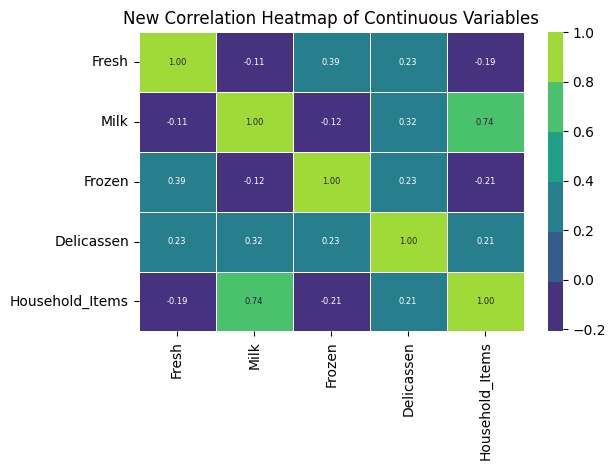

In [153]:
# Calculate the correlation matrix
correlation_matrix = nums.corr()

plt.figsize=(12,6)
sns.heatmap(correlation_matrix,
            annot=True,
            cmap=palette_a,
            linewidths=.5,
            annot_kws={"size": 6},
            fmt=".2f")

plt.title("New Correlation Heatmap of Continuous Variables",
          fontsize=12,
          fontweight='medium')
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig(f'{img_path}Correlation_Heatmap_NEW_Features.png',
            dpi=300,
            bbox_inches='tight')
plt.show()

From these new relationships:
- Milk buying is moderately, positively correlated to Household_Items.

##### Scaling

In [154]:
nums.describe().T

,count,mean,std,min,25%,50%,75%,max
Fresh,428.0,8.765536,1.201074,6.036318,8.037704,9.014864,9.711896,10.385952
Milk,428.0,8.079860,0.934978,6.383084,7.307536,8.185350,8.848007,9.585848
Frozen,428.0,7.296876,1.145436,4.970160,6.598118,7.312545,8.154207,9.178143
Delicassen,428.0,6.668006,1.081009,4.164337,6.005737,6.833029,7.482260,8.355403
Household_Items,428.0,8.622502,1.121061,1.945910,7.826942,8.573195,9.494616,10.862474


In [155]:
# Standardizing...
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_nums = scaler.fit_transform(nums)
scaled_nums_df = pd.DataFrame(scaled_nums, columns=nums.columns)

In [156]:
scaled_nums_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Fresh,428.0,3.901344e-16,1.00117,-2.274974,-0.606694,0.207831,0.788850,1.350719
Milk,428.0,9.960879e-17,1.00117,-1.816900,-0.827001,0.112959,0.822528,1.612605
Frozen,428.0,1.577139e-16,1.00117,-2.033670,-0.610751,0.013696,0.749351,1.644324
Delicassen,428.0,-4.025855e-16,1.00117,-2.318759,-0.613357,0.152836,0.754117,1.562774
Household_Items,428.0,-4.316381e-16,1.00117,-5.962571,-0.710480,-0.044034,0.778846,2.000420


### Saving Outputs

Notes:
  - 'Data' has the new features, it's clean and the outliers were dropped/removed.
  - 'Nums' is what I'm actually working with to use on my models.

In [157]:
data.head(2)

,Channel,Region,Fresh,Milk,Frozen,Delicassen,Household_Items
0,2,3,12669,9656,214,1338,10235
1,2,3,7057,9810,1762,1776,12861


In [158]:
nums.head(2)

,Fresh,Milk,Frozen,Delicassen,Household_Items
0,9.446992,9.175438,5.370638,7.199678,9.233666
1,8.861917,9.191259,7.474772,7.482682,9.462033


In [ ]:
# Save the data
data.to_csv(f'{outputs_path}semi-processed_data.csv', index=False)
nums.to_csv(f'{outputs_path}semi-processed_nums.csv', index=False)

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [160]:
# Imports
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [161]:
# Loading the data
k_data = pd.read_csv(f'{outputs_path}data.csv')
kmeans_df = pd.read_csv(f'{outputs_path}nums.csv')

kmeans_df.shape, kmeans_df.columns

((428, 5),
 Index(['Fresh', 'Milk', 'Frozen', 'Delicassen', 'Household_Items'], dtype='object'))

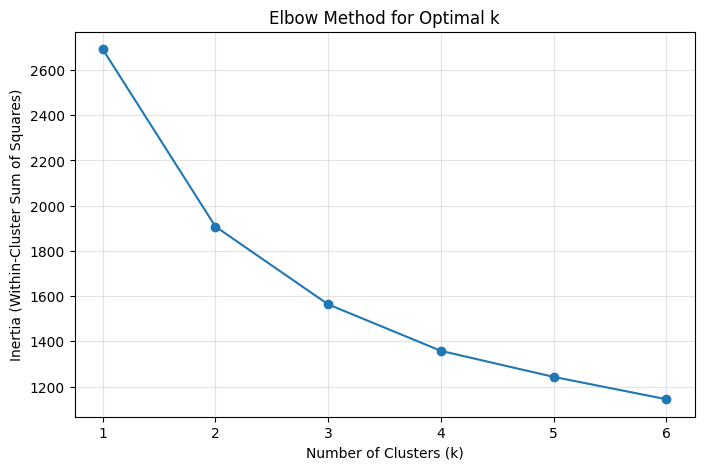

In [165]:
X = kmeans_df

# Checking for optimal k
k_values = range(1, 7)
inertia_values = []

# Loop
for k in k_values:
  # Elbow...
  kmeans = KMeans(n_clusters=k,
                  init='k-means++',
                  random_state=11,
                  n_init=10)
  kmeans.fit(X)
  inertia_values.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values,
         inertia_values,
         marker='o',
         linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True,
         alpha=.35)

plt.savefig(f'{img_path}Kmeans_Cluster.png',
            dpi=300,
            bbox_inches='tight')
plt.show()

In [163]:
optimal_k = 2 # From the plot above...
kmeans = KMeans(n_clusters=optimal_k,
                init='k-means++',
                random_state=11,
                n_init=10)

# Fit
kmeans.fit(X)

KMeans(n_clusters=2, n_init=10, random_state=11)

In [164]:
# Get the labels
labels = kmeans.labels_

# Add the cluster labels
k_data['cluster'] = labels
kmeans_df['cluster'] = labels

# Calculate the mean values of features for each cluster
cluster_means = kmeans_df.groupby('cluster').mean().T

cluster_means

cluster,0,1
Fresh,8.175089,9.293281
Milk,8.728314,7.500268
Frozen,6.667967,7.858998
Delicassen,6.745407,6.598824
Household_Items,9.397452,7.929848


# Part III - Hierarchical Clustering

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [166]:
# Loading the data
hc_data = pd.read_csv(f'{outputs_path}data.csv')
hc_df = pd.read_csv(f'{outputs_path}nums.csv')

hc_df.shape

(428, 5)

In [167]:
# Imports
from scipy.cluster.hierarchy import dendrogram, linkage

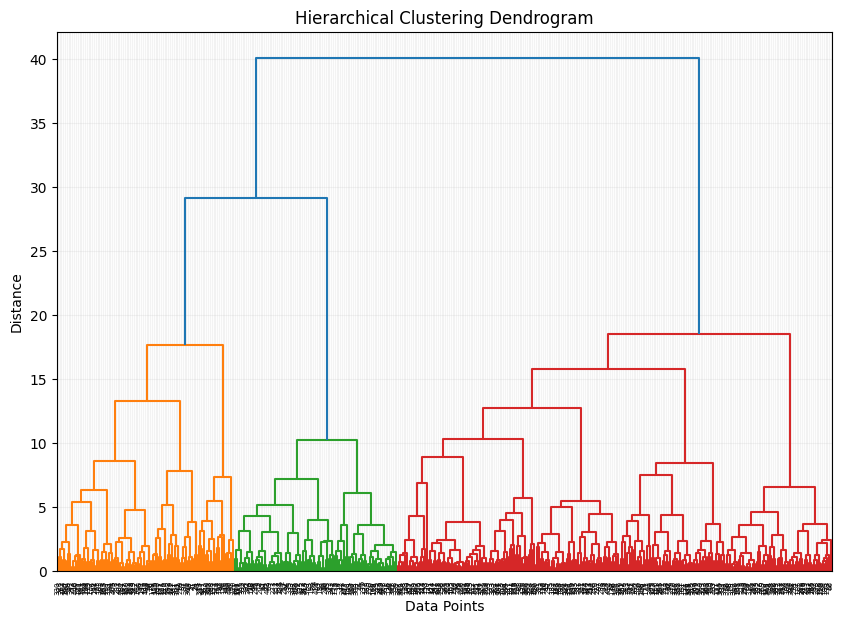

In [ ]:
X = hc_df

Z = linkage(X,
            method='ward',
            metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.grid(True,
         alpha=.15)

plt.savefig(f'{img_path}Heirarchical_Cluster.png',
            dpi=300,
            bbox_inches='tight')
plt.show()

In [ ]:
# I think 3 clusters would be nice...
from scipy.cluster.hierarchy import fcluster

distance_threshold = 20 # The major split into 3 seems to be happening just under 20
clusters = fcluster(Z,
                    t=distance_threshold,
                    criterion='distance')
hc_df['cluster'] = clusters

# Calculate the mean values of features for each cluster
h_cluster_means = hc_df.groupby('cluster').mean().T

h_cluster_means

cluster,1,2,3
Fresh,9.169672,9.288915,7.295161
Milk,7.562610,8.967801,8.531137
Frozen,7.709398,7.389661,6.201407
Delicassen,6.590947,7.568844,6.029421
Household_Items,7.977039,9.597740,9.307603


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [175]:
# Loading the data
pca_data = pd.read_csv(f'{outputs_path}data.csv')
pca_df = pd.read_csv(f'{outputs_path}nums.csv')

pca_df.shape

(428, 5)

In [176]:
# Imports
from sklearn.decomposition import PCA

X = pca_df

pca = PCA()
X_pca = pca.fit_transform(X)

In [177]:
# Check the explained variance ratio to see how much variance is captured by each principal component.
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio, '\n')

# Check the cumulative variance ratio to determine how many components to keep...
cumulative_variance = np.cumsum(explained_variance_ratio)
print(cumulative_variance)

[0.37876939 0.31883197 0.13982937 0.12068632 0.04188296] 

[0.37876939 0.69760136 0.83743073 0.95811704 1.        ]


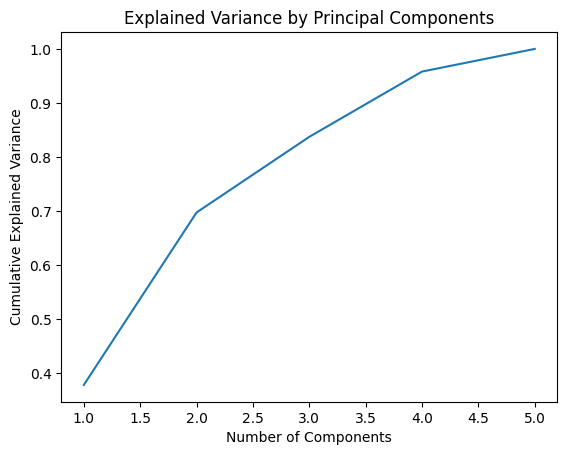

In [178]:
# Visualize the explained variance to help choose the number of components.
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')

plt.savefig(f'{img_path}Explained_Variance.png',
            dpi=300,
            bbox_inches='tight')
plt.show()

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

### Post-Processing

In [180]:
# Adding the clusters to data.
data['k_cluster'] = k_data['cluster']
data['h_cluster'] = hc_df['cluster']

print(data.shape)
display(data.head())

(428, 9)


,Channel,Region,Fresh,Milk,Frozen,Delicassen,Household_Items,k_cluster,h_cluster
0,2,3,12669,9656,214,1338,10235,0.0,2.0
1,2,3,7057,9810,1762,1776,12861,0.0,2.0
2,2,3,6353,8808,2405,7844,11200,0.0,2.0
3,1,3,13265,1196,6404,1788,4728,1.0,1.0
4,2,3,22615,5410,3915,5185,8975,1.0,2.0


##### Saving

In [6]:
# New folder...
final_outputs = f'{outputs_path}final/'

os.makedirs(final_outputs, exist_ok=True)

In [ ]:
# Saving outputs...
data.to_csv(f'{final_outputs}processed_data.csv', index=False)
nums.to_csv(f'{final_outputs}new_nums.csv', index=False)

##### Importing...

In [11]:
fdata = pd.read_csv(f'{final_outputs}processed_data.csv') # Final data... I need to reimport so I don't have to run the whole notebook again... :>

display(fdata.head())
display(fdata.describe())

,Channel,Region,Fresh,Milk,Frozen,Delicassen,Household_Items,k_cluster,h_cluster
0,2,3,12669,9656,214,1338,10235,0.0,2.0
1,2,3,7057,9810,1762,1776,12861,0.0,2.0
2,2,3,6353,8808,2405,7844,11200,0.0,2.0
3,1,3,13265,1196,6404,1788,4728,1.0,1.0
4,2,3,22615,5410,3915,5185,8975,1.0,2.0


,Channel,Region,Fresh,Milk,Frozen,Delicassen,Household_Items,k_cluster,h_cluster
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,416.000000,416.000000
mean,1.310748,2.537383,11458.787383,5000.871495,2931.357477,1346.383178,9474.698598,0.533654,1.658654
std,0.463341,0.777918,11381.983495,4773.694993,4527.189356,1544.687250,9916.334478,0.499467,0.823640
min,1.000000,1.000000,3.000000,55.000000,25.000000,3.000000,6.000000,0.000000,1.000000
25%,1.000000,2.000000,3094.500000,1490.500000,732.750000,404.750000,2506.250000,0.000000,1.000000
50%,1.000000,3.000000,8223.500000,3587.000000,1498.000000,927.000000,5287.000000,1.000000,1.000000
75%,2.000000,3.000000,16512.250000,6959.500000,3477.000000,1775.250000,13287.000000,1.000000,2.000000
max,2.000000,3.000000,76237.000000,27472.000000,60869.000000,14472.000000,52180.000000,1.000000,3.000000


##### K-Clusters

In [60]:
# k_clusters
k_clusters_mean = fdata.groupby('k_cluster').mean()

k_clusters_mean

,Channel,Region,Fresh,Milk,Frozen,Delicassen,Household_Items,h_cluster
k_cluster,,,,,,,,
0.0,1.360825,2.587629,10667.603093,5356.072165,2776.402062,1434.402062,10893.427835,2.242268
1.0,1.279279,2.468468,12050.418919,4697.693694,3054.099099,1262.639640,8213.189189,1.148649


In [63]:
columns = k_clusters_mean.columns[2:-1] #  Except first 2 and last

# Add columns, sum
k_clusters_summation_of_means = k_clusters_mean[columns].sum(axis=1)

print(f'Cluster 0: {k_clusters_summation_of_means[0]:.2f}\nCluster 1: {k_clusters_summation_of_means[1]:.2f}\n\n- It seems that Cluster 0 has a higher total purchase amount on average.')

Cluster 0: 31127.91
Cluster 1: 29278.04

- It seems that Cluster 0 has a higher total purchase amount.


In [67]:
# Add to df...
k_clusters_mean['total_avg_purchase'] = k_clusters_summation_of_means
k_clusters_mean.T

k_cluster,0.0,1.0
Channel,1.360825,1.279279
Region,2.587629,2.468468
Fresh,10667.603093,12050.418919
Milk,5356.072165,4697.693694
Frozen,2776.402062,3054.099099
Delicassen,1434.402062,1262.639640
Household_Items,10893.427835,8213.189189
h_cluster,2.242268,1.148649
total_avg_purchase,31127.907216,29278.040541


> In a more general sense... it appears that Cluster 0 spends more compared to Cluster 1. However, the difference is not that substantial.

More notes...
- Cluster 0:
  - Spends the most on Household Items, Milk and Deli.
  - Spends the most overall.
- CLuster 1:
  - Spends the most on Fresh and Frozen.

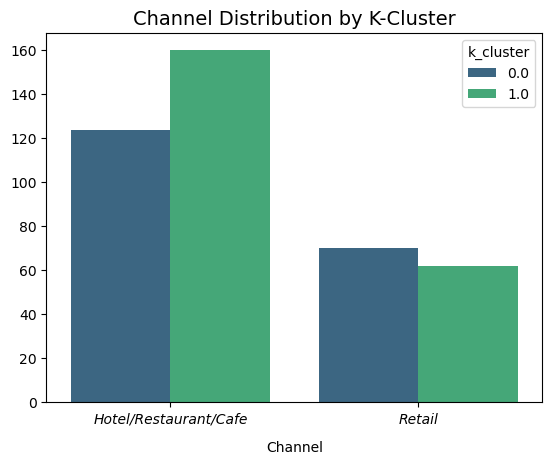

In [91]:
sns.countplot(x='Channel',
              hue='k_cluster',
              data=fdata,
              palette='viridis')
plt.title('Channel Distribution by K-Cluster',
          fontsize=14,
          fontweight='medium')
plt.xlabel('Channel',
           labelpad=10)
plt.xticks(ticks=[0, 1],
           labels=['Hotel/Restaurant/Cafe', 'Retail'],
           fontstyle='italic')
plt.ylabel(None)

plt.savefig(f'{img_path}Channel_Distribution.png',
            dpi=300,
            bbox_inches='tight')
plt.show()

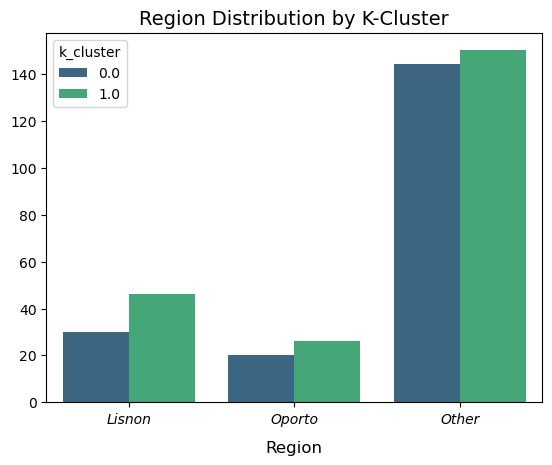

In [90]:
sns.countplot(x='Region',
              hue='k_cluster',
              data=fdata,
              palette='viridis')
plt.title('Region Distribution by K-Cluster',
          fontsize=14,
          fontweight='medium')
plt.xlabel('Region',
           labelpad=10,
           fontsize=12)
plt.xticks(ticks=[0, 1, 2],
           labels=['Lisnon', 'Oporto', 'Other'],
           fontstyle='italic')
plt.ylabel(None)

plt.savefig(f'{img_path}Region_Distribution.png',
            dpi=300,
            bbox_inches='tight')
plt.show()

##### H-Clusters

In [92]:
# h_clusters
h_clusters_mean = fdata.groupby('h_cluster').mean()
h_clusters_mean.head()

,Channel,Region,Fresh,Milk,Frozen,Delicassen,Household_Items,k_cluster
h_cluster,,,,,,,,
1.0,1.283898,2.474576,11797.940678,4821.805085,2995.724576,1324.385593,8936.805085,0.834746
2.0,1.372093,2.639535,11156.639535,5401.720930,2964.523256,1490.511628,9303.895349,0.197674
3.0,1.351064,2.542553,10648.117021,5100.765957,2709.489362,1253.627660,10930.127660,0.085106


In [102]:
columns = h_clusters_mean.columns[2:] #  Except first 2

# Add columns, sum
h_clusters_summation_of_means = h_clusters_mean[columns].sum(axis=1)

print(f'Cluster 0: {h_clusters_summation_of_means[1]:.2f}\nCluster 1: {h_clusters_summation_of_means[2]:.2f}\nCluster 3: {h_clusters_summation_of_means[3]:.2f}\n\n- It seems that Cluster 3 has a higher total purchase amount on average... but I would consider them all to be pretty close.')

Cluster 0: 29877.50
Cluster 1: 30317.49
Cluster 3: 30642.21

- It seems that Cluster 3 has a higher total purchase amount on average... but I would consider them all to be pretty close.


In [103]:
# Add to df...
h_clusters_mean['total_avg_purchase'] = h_clusters_summation_of_means
h_clusters_mean.T

h_cluster,1.0,2.0,3.0
Channel,1.283898,1.372093,1.351064
Region,2.474576,2.639535,2.542553
Fresh,11797.940678,11156.639535,10648.117021
Milk,4821.805085,5401.720930,5100.765957
Frozen,2995.724576,2964.523256,2709.489362
Delicassen,1324.385593,1490.511628,1253.627660
Household_Items,8936.805085,9303.895349,10930.127660
k_cluster,0.834746,0.197674,0.085106
total_avg_purchase,29877.495763,30317.488372,30642.212766


Notes...
- Cluster 1:
  - Spends the most on Fresh & Frozen
  - Spends the least on Milk, Household Items and overall.
- Cluster 2:
  - Spends the most on Milk and Deli. Roughly the same amount in Frozen as cluster 1.
- Cluster 3:
  - Spends the least on Milk, Frozen and Deli.
  - Spends the most on Household Items and the highest spenders overall.

C:\Users\kadm2\AppData\Local\Temp\ipykernel_12660\80785210.py:1: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.countplot(x='Channel',


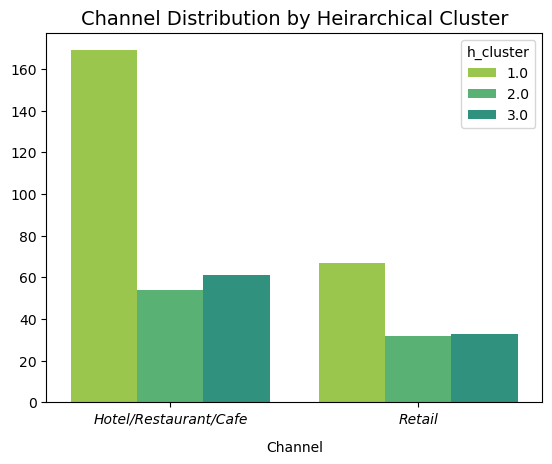

In [108]:
sns.countplot(x='Channel',
              hue='h_cluster',
              data=fdata,
              palette=palette_b)
plt.title('Channel Distribution by Heirarchical Cluster',
          fontsize=14,
          fontweight='medium')
plt.xlabel('Channel',
           labelpad=10)
plt.xticks(ticks=[0, 1],
           labels=['Hotel/Restaurant/Cafe', 'Retail'],
           fontstyle='italic')
plt.ylabel(None)

plt.savefig(f'{img_path}Channel_Distribution_HC.png',
            dpi=300,
            bbox_inches='tight')
plt.show()

C:\Users\kadm2\AppData\Local\Temp\ipykernel_12660\1092988598.py:1: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.countplot(x='Region',


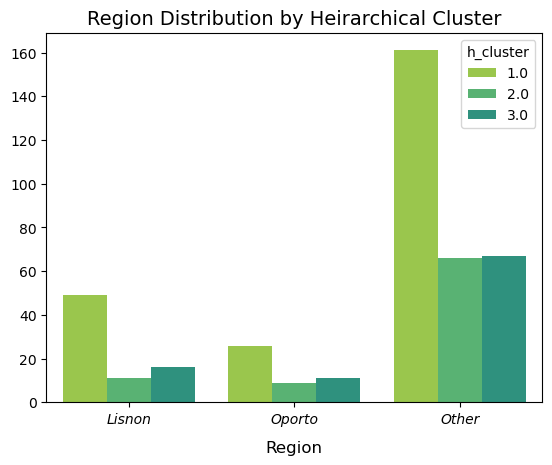

In [113]:
sns.countplot(x='Region',
              hue='h_cluster',
              data=fdata,
              palette=palette_b)
plt.title('Region Distribution by Heirarchical Cluster',
          fontsize=14,
          fontweight='medium')
plt.xlabel('Region',
           labelpad=10,
           fontsize=12)
plt.xticks(ticks=[0, 1, 2],
           labels=['Lisnon', 'Oporto', 'Other'],
           fontstyle='italic')
plt.ylabel(None)

plt.savefig(f'{img_path}Region_Distribution_HC.png',
            dpi=300,
            bbox_inches='tight')
plt.show()

### Findings, Insights and Future Goals

- Customers with high Fresh and Frozen product spending tend to spend proportionally less on other product categories.
- Customers with high Frozen product spending show a less pronounced but still noticeable inverse relationship with other categories.
- K-means clustering suggests two main customer segments based on purchasing patterns.
- Hierarchical clustering analysis indicates a potential segmentation into three distinct customer groups.
- PCA reveals that all principal components (6) captured a significant portion of the variance in the data. I've tried adding more features, PCA showed me that it didn't help. You can check out the previous PCA result [here](/images/Explained_Variance_Old.png).

> It can be said that there's not a lot of difference between the purchasing habits of all clusters in terms of monetary units. Meaning, they all spend about the same amount of money on us annually, just towards different product types.

> It appears that our main regions of focus were Lisnon and Oporto... but it could also just mean that these two were the most profitable regions and 'Other' is a culmination of the rest. As observed on our region distribution by cluster charts, Lisnon is our best performing region with more diversified purchases overall.

#### Insights/Recommendations

- **Cross-selling opportunities and Targeted Promotions:**
  > This may encourage them to diversify their purchases, or consider choosing us to be their main supplier of more goods.
    - K-Cluster 0: Offer promotions on Fresh and Frozen products.
    - K-Cluster 1: Offer promotions on Household Items, Milk and Deli products.
    - H-Cluster 1: Offer promotions on Milk and Household Items.
    - H-Cluster 2: More generalized promotions and maybe Deli and Frozen specifically, just because those appear to be our less-ordered items in general. This appears to be more of a 'median' cluster.
    - H-Cluster 3: Offer promotions on Milk, Frozen and Deli.
- **Inventory management:** Optimized inventory levels based on customer segmentation. The clusters could define the expected demand per group, optimizing procurement and minimizing stockouts.
  > This means... for Lisnon, we can allocate x amount per month of y item (if we have time data) and plan our logistics accordingly.

#### Future Goals

- **Time-series analysis:** Incorporate time-dependent features (e.g. purchase frequency, seasonality, or promotions) to understand the dynamics of customer behavior. These data/time data should also allow us to estimate amount allocations/product quantity and help us plan more effectively.
- **Customer lifetime value (CLTV) prediction:** Leverage the clustering and purchase behavior data to predict CLTV. Use this information to focus retention efforts on high-value customers, improving customer engagement and satisfaction.
- **A/B testing of promotional strategies:** Run A/B tests on various offers and promotions in order to gauge effectiveness, optimize promotions and assess customer response to different incentives.
- **Predictive modeling:** Develop predictive models for customer churn and future product demand to improve financial projections.

##### More...

<span style="font-size:14px;">
I've tried a number of combinations/variations of my dataset with k-means clustering, heirarchical clustering and PCA.
<br><br>
My added features did show me new relationships in terms of correlation... but PCA showed that it didn't really matter that much in the overall. As an example, when I ran k-means on the dataset... just original features, just new features and then all of them together... the result was always 2. Looking back, that should have been my first clue. I kept going as I thought it would change somehow/make a difference if I ran heirarchical or PCA.
<br><br>
I removed the added features and then merged together Detergent_Paper with Grocery as Household_Items. It left me with 5 features, which still allowed the model to capture 100% (reach 1) at the 5th PC. So, in the end, the added features did not add new info.
</span>